In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.rcParams['font.family'] = 'AppleGothic' 

#지역별 신재생 에너지 발전량 
energy_df = pd.read_excel('2024신재생에너지 현황 목록.xlsx', skiprows=1)
energy_df.head(5)

,발전원,지역구분,시도구분,개수,용량,지역개수,지역용량,연도
0,태양광,강원특별자치도,강릉시,120,10046.06,1420,"163,529.16",2024
1,태양광,강원특별자치도,고성군,116,11968.6,1420,"163,529.16",2024
2,태양광,강원특별자치도,동해시,10,572.25,1420,"163,529.16",2024
3,태양광,강원특별자치도,삼척시,34,10617.11,1420,"163,529.16",2024
4,태양광,강원특별자치도,속초시,10,619.97,1420,"163,529.16",2024


In [3]:
#지역별 발전량
loc_df = pd.read_csv('HOME_발전·판매_발전량_지역별.csv', encoding = "euc-kr")
loc_df.head(5)

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2023,5115143.000,3.749768e+07,2.132742e+06,4.819489e+07,840711.000,303902.000,3.003559e+07,3.913222e+06,8.764708e+07,3.642853e+07,3191549.000,1.059838e+08,1.537567e+07,6.726560e+07,9.465638e+07,4.470857e+07,4755443.000
1,2022,4336753.909,4.657933e+07,2.468916e+06,5.428345e+07,769032.947,295032.691,3.364133e+07,3.278703e+06,8.578016e+07,3.387653e+07,2763199.957,1.078128e+08,1.499092e+07,5.938354e+07,8.984390e+07,4.948159e+07,4815152.918
2,2021,5343889.297,4.035395e+07,2.811757e+06,6.050626e+07,644018.382,182180.361,3.150358e+07,3.776644e+06,8.223265e+07,3.062279e+07,2204815.677,1.112285e+08,1.432243e+07,6.184102e+07,8.138167e+07,4.388539e+07,3967926.374
3,2020,5122176.000,4.064738e+07,2.568644e+06,5.713563e+07,609551.000,167834.000,2.980867e+07,3.552567e+06,7.251266e+07,2.787505e+07,2221149.000,1.141039e+08,1.259953e+07,5.821711e+07,8.586558e+07,3.533287e+07,3821827.000
4,2019,1846891.377,3.752790e+07,2.877896e+06,6.005289e+07,562074.508,167975.238,2.901605e+07,2.463630e+06,7.397688e+07,2.871589e+07,1604430.710,1.239050e+08,1.228227e+07,5.575383e+07,7.982709e+07,4.846502e+07,3994629.140


In [4]:
energy_df.describe()

,연도
count,945.000000
mean,2022.499471
std,1.127586
min,2021.000000
25%,2021.000000
50%,2022.000000
75%,2024.000000
max,2024.000000


In [5]:
loc_df.describe()

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,2012.500000,1.878070e+06,3.772285e+07,1.207077e+06,5.436073e+07,295357.262527,206177.625368,1.638607e+07,1.209320e+06,4.158869e+07,1.492704e+07,1.470226e+06,1.064129e+08,6.833271e+06,6.261581e+07,7.499570e+07,5.509347e+07,2.951444e+06
std,6.493587,1.562929e+06,5.893050e+06,1.267521e+06,1.685568e+07,295146.411359,41676.547500,8.770190e+06,1.662700e+06,2.691631e+07,1.104280e+07,6.295160e+05,1.869806e+07,5.244396e+06,7.875539e+06,1.011140e+07,1.007532e+07,9.430333e+05
min,2002.000000,6.407394e+05,2.655092e+07,1.139070e+05,2.173527e+07,0.000000,151727.000000,8.103303e+06,0.000000e+00,1.571518e+07,4.706870e+06,6.873660e+05,6.983655e+07,6.890160e+05,4.627340e+07,5.270530e+07,3.533287e+07,1.497661e+06
25%,2007.250000,8.523922e+05,3.584955e+07,1.354950e+05,4.563485e+07,13307.750000,182244.020750,1.021840e+07,0.000000e+00,1.823428e+07,5.991111e+06,1.151841e+06,9.868622e+07,1.117482e+06,5.850871e+07,7.077378e+07,4.971129e+07,2.355270e+06
50%,2012.500000,1.207592e+06,3.751279e+07,2.831495e+05,5.859426e+07,260777.000000,191801.577000,1.141910e+07,0.000000e+00,2.866226e+07,1.030506e+07,1.289622e+06,1.114368e+08,7.400082e+06,6.148882e+07,7.354630e+07,5.187703e+07,3.055074e+06
75%,2017.750000,1.947622e+06,4.004830e+07,2.629255e+06,6.518680e+07,550179.437900,228033.750000,2.215500e+07,2.999568e+06,6.984718e+07,2.613426e+07,1.621345e+06,1.186408e+08,1.123581e+07,6.759529e+07,8.175896e+07,5.906795e+07,3.323909e+06
max,2023.000000,5.343889e+06,5.100666e+07,3.105758e+06,8.086125e+07,840711.000000,303902.000000,3.364133e+07,3.913222e+06,8.764708e+07,3.642853e+07,3.191549e+06,1.318970e+08,1.537567e+07,7.846071e+07,9.465638e+07,7.568456e+07,4.815153e+06


In [6]:
print(energy_df.columns.tolist())

['발전원', '지역구분', '시도구분', '개수', '용량', '지역개수', '지역용량', '연도']


Question -> 계약량 추이,계약량과 비교하여 실제 에너지 발전량이 얼마나 늘었는지?,탄소회피는 얼마나 되었는지

1)계약량 추이 
2) 계약량 vs 실제 발전량 = 계약된 MW와 실제 발전된 MWh 비교 
3) 탄소회피량 = 발전량 × 0.465 해서 tCO₂ 계산

지역별 계약 추이 분석→정부·지자체의 신재생 전환 의지 파악
계약량과 실제 발전량 간의 상관관계 분석→ 실질 이행수준 평가
계약량과 탄소 회피량 간 회귀 분석→ 정량적 효과 도출

In [7]:
#Q1: 계약량 추이
replace_dict = {
    '강원특별자치도': '강원',
    '경기도': '경기',
    '경상북도': '경북',
    '경상남도': '경남',
    '전라북도': '전북',
    '전라남도': '전남',
    '전북특별자치도': '전북',
    '충청북도': '충북',
    '충청남도': '충남',
    '제주특별자치도': '제주',
    '서울특별시': '서울',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '인천광역시': '인천',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '세종특별자치시': '세종'
}

energy_df['시도구분'] = energy_df['지역구분'].replace(replace_dict)
energy_df

,발전원,지역구분,시도구분,개수,용량,지역개수,지역용량,연도
0,태양광,강원특별자치도,강원,120,10046.06,1420,"163,529.16",2024
1,태양광,강원특별자치도,강원,116,11968.6,1420,"163,529.16",2024
2,태양광,강원특별자치도,강원,10,572.25,1420,"163,529.16",2024
3,태양광,강원특별자치도,강원,34,10617.11,1420,"163,529.16",2024
4,태양광,강원특별자치도,강원,10,619.97,1420,"163,529.16",2024
...,...,...,...,...,...,...,...,...
940,연료전지,서울특별시,서울,5호미만제거,-,-,-,2021
941,바이오에너지,경기도,경기,5호미만제거,-,-,-,2021
942,매립지가스(LFG),전라남도,전남,5호미만제거,-,-,-,2021
943,조력,전라남도,전남,5호미만제거,-,-,-,2021


In [8]:
#Q1: 계약량 추이

energy_df1= energy_df.groupby(['연도', '시도구분'])['용량'].sum().reset_index()
energy_df1

#energy_df1['용량'] = pd.to_numeric(energy_df1['용량'], errors='coerce')
#energy_df1.isnull().sum()

,연도,시도구분,용량
0,2021,강원,10046.0611968.6572.2510617.11619.974152.58578....
1,2021,경기,3091.513962495.32698.2-2729.1--6199.72797.6---...
2,2021,경남,923.1718778.035116.7911131.054455.5510317.8195...
3,2021,경북,15119.6222687.636858.8424117.5432070.1217891.6...
4,2021,광주,20751.33238.28-3621.161912-
...,...,...,...
63,2024,전남,17138.9612878.314080.2114556.61956.2748894.821...
64,2024,전북,74179.3234023.4147049.2461061.565885.6219555.2...
65,2024,제주,25337.6319969.58
66,2024,충남,-30172.7225464.4829331.2817725.9311652.9416347...


In [11]:
#Q1: 계약량 추이

energy_df1['용량'].unique()
energy_df.isnull().sum()
energy_df1['용량'] = pd.to_numeric(energy_df1['용량'], errors='coerce')
energy_df1 = energy_df1.dropna(subset=['용량'])
energy_df1['용량'] = energy_df1['용량'].round(3)
energy_df1




/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_27219/434010401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df1['용량'] = pd.to_numeric(energy_df1['용량'], errors='coerce')


,연도,시도구분,용량
9,2021,세종,3880.81
26,2022,세종,4247.50
43,2023,세종,4980.24
48,2023,제주,-1218.35
60,2024,세종,3880.81


In [14]:
#Q1: 계약량 추이
#use시도구분
energy_df2 = energy_df.groupby(['연도', '시도구분'])['용량'].sum().reset_index()

energy_df2['용량'] = pd.to_numeric(energy_df2['용량'], errors='coerce')
energy_df2['용량'] = pd.to_numeric(energy_df['용량'], errors='coerce')  
energy_df2['용량'] = energy_df2['용량'].round(3)  
energy_df2

,연도,시도구분,용량
0,2021,강원,10046.06
1,2021,경기,11968.60
2,2021,경남,572.25
3,2021,경북,10617.11
4,2021,광주,619.97
...,...,...,...
63,2024,전남,13011.43
64,2024,전북,10755.14
65,2024,제주,6836.77
66,2024,충남,1113.24


/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_27219/3353872338.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='시도구분', y='용량', data=energy_df2, estimator='sum', ci=None)


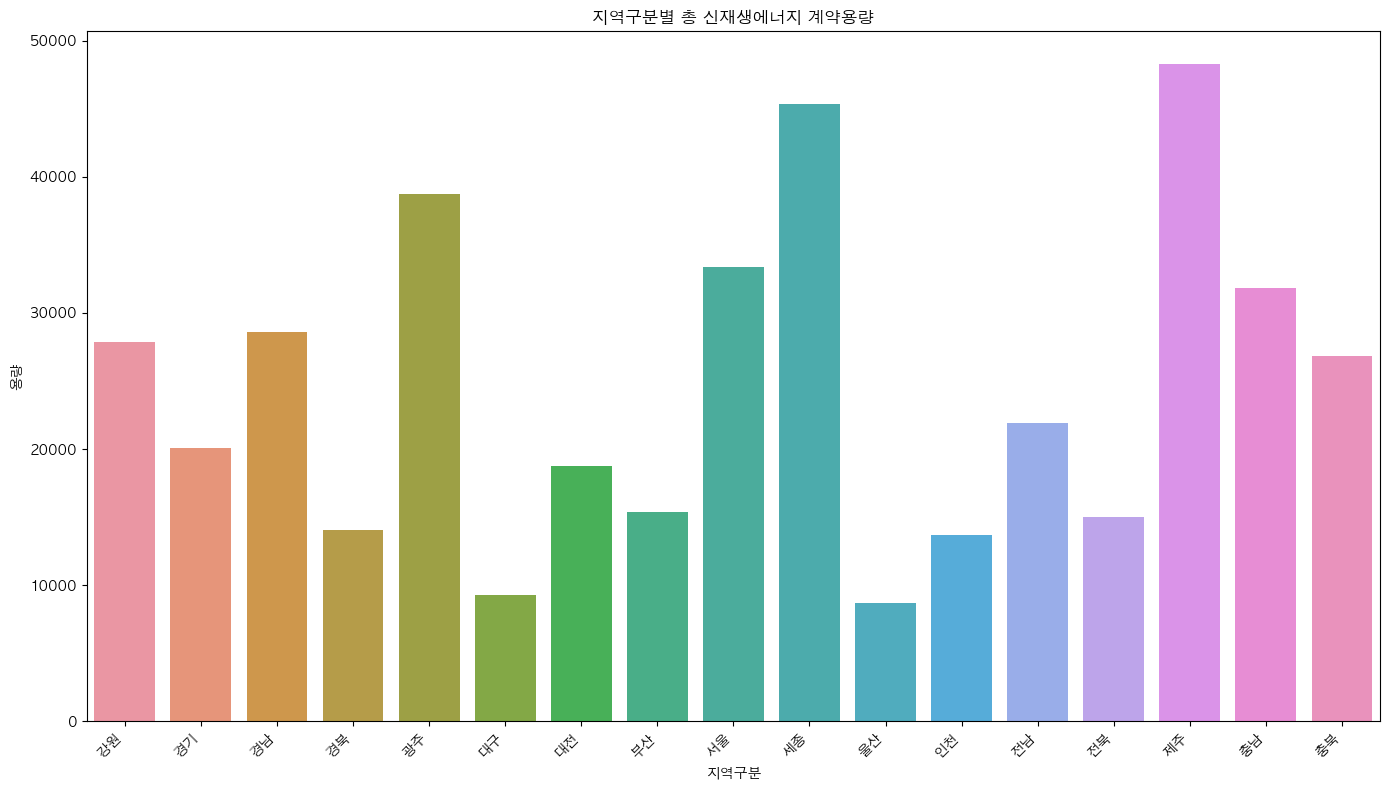

In [15]:
#Q1: 계약량 추이
#Total Capacity by Region

#plot
plt.figure(figsize=(14, 8))
sns.barplot(x='시도구분', y='용량', data=energy_df2, estimator='sum', ci=None)

plt.title('지역구분별 총 신재생에너지 계약용량')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.xlabel('지역구분')
plt.tight_layout()
plt.show()

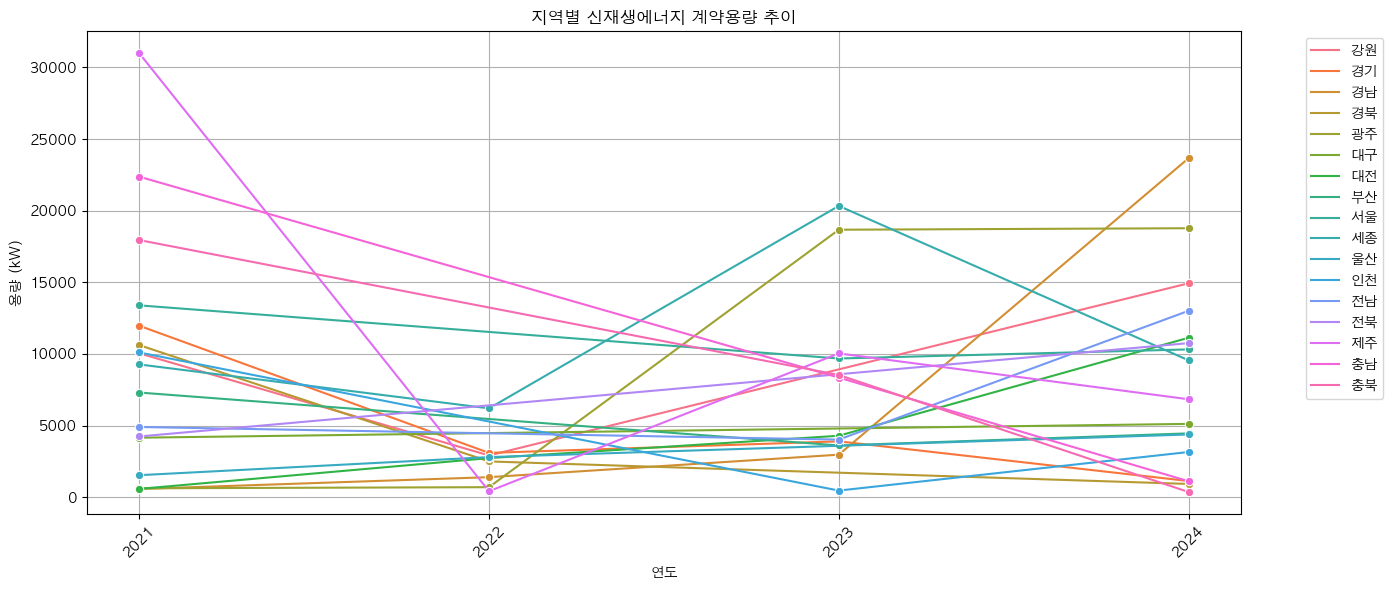

In [17]:
#Q1: 계약량 추이
#Trends over Time per Region

#plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=energy_df2, x='연도', y='용량', hue='시도구분', marker='o')
plt.title('지역별 신재생에너지 계약용량 추이')
plt.xticks(ticks=sorted(energy_df2['연도'].unique()), rotation=45)
plt.ylabel('용량 (kW)')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
#use 지역구분

energy_df['용량'] = pd.to_numeric(energy_df['용량'], errors='coerce')
energy_df3= energy_df.groupby(['연도', '지역구분'])['용량'].sum().reset_index()
energy_df3['용량'] = energy_df3['용량'].round(3)
energy_df3



,연도,지역구분,용량
0,2021,강원특별자치도,163529.16
1,2021,경기도,154402.04
2,2021,경상남도,161148.91
3,2021,경상북도,501348.06
4,2021,광주광역시,26522.77
...,...,...,...
63,2024,전라남도,363064.93
64,2024,전북특별자치도,456449.20
65,2024,제주특별자치도,45307.21
66,2024,충청남도,272245.10


/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_27219/2677658223.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='지역구분', y='용량', data=energy_df3, estimator='sum', ci=None)


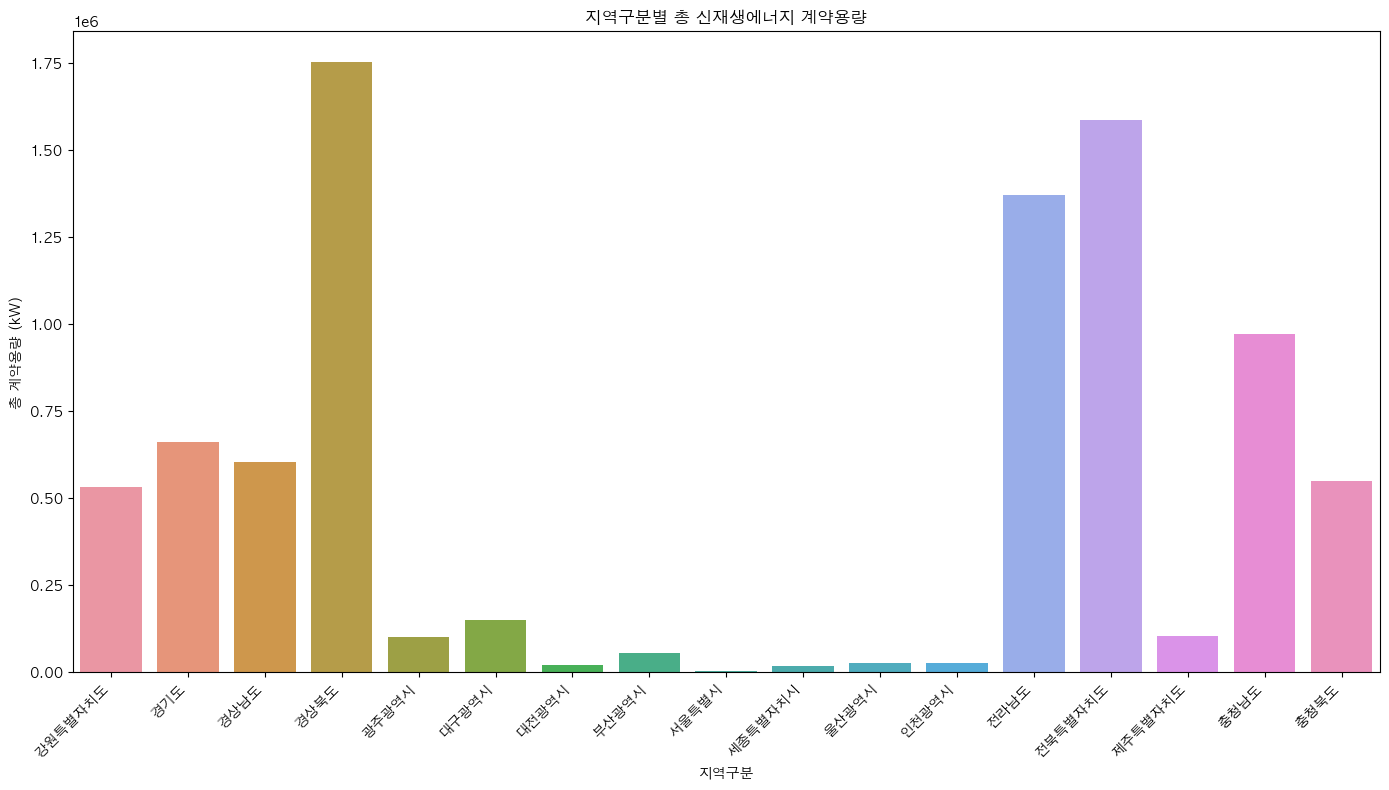

In [19]:
#Q1: 계약량 추이
#Total Capacity by Region(지역구분)

#plot
plt.figure(figsize=(14, 8))
sns.barplot(x='지역구분', y='용량', data=energy_df3, estimator='sum', ci=None)

plt.title('지역구분별 총 신재생에너지 계약용량')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.ylabel('총 계약용량 (kW)')
plt.xlabel('지역구분')
plt.tight_layout()
plt.show()

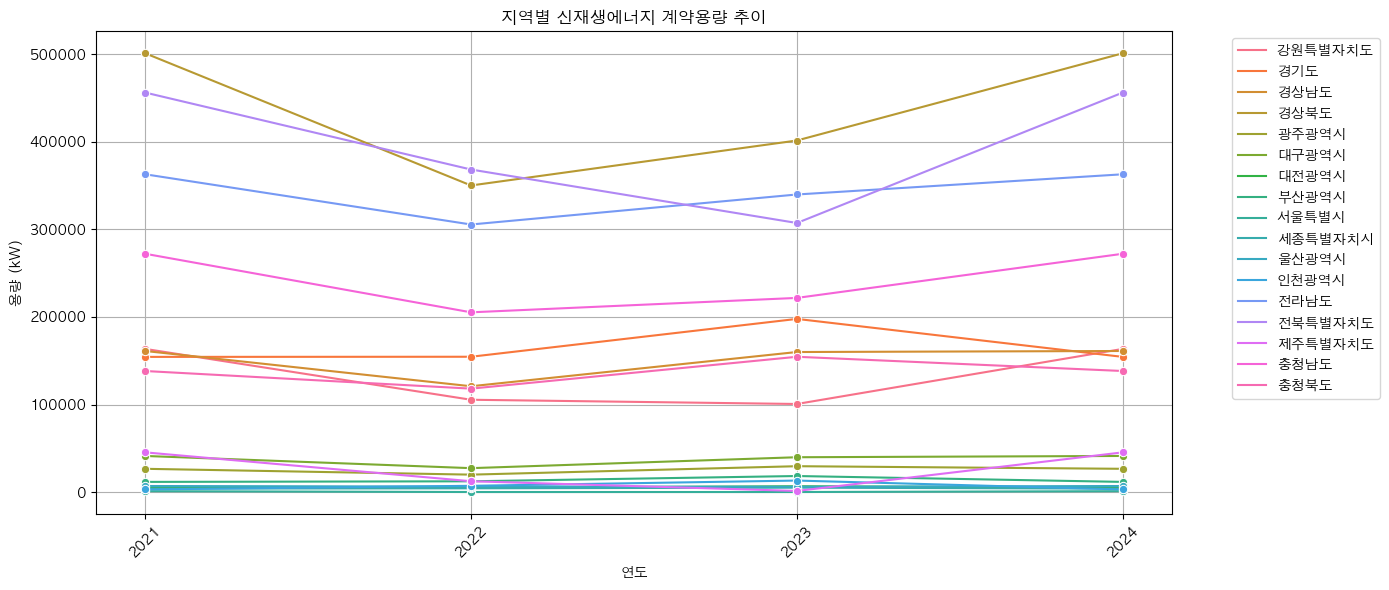

In [20]:
#Q1: 계약량 추이
#Trends over Time per Region(지역구분)

#plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=energy_df3, x='연도', y='용량', hue='지역구분', marker='o')
plt.title('지역별 신재생에너지 계약용량 추이')
plt.xticks(ticks=sorted(energy_df3['연도'].unique()), rotation=45)
plt.ylabel('용량 (kW)')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [21]:
energy_df4 = energy_df[['연도', '시도구분', '용량']]
energy_df4.dropna(inplace=True)
energy_df4


/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_27219/2149263191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df4.dropna(inplace=True)


,연도,시도구분,용량
0,2024,강원,10046.06
1,2024,강원,11968.60
2,2024,강원,572.25
3,2024,강원,10617.11
4,2024,강원,619.97
...,...,...,...
930,2021,충북,3430.71
931,2021,충북,1197.05
932,2021,충북,15595.68
933,2021,충북,3996.95


In [22]:
loc_df.columns = loc_df.columns.str.strip()
loc_df_melted = loc_df.melt(id_vars='연도', var_name='시도구분', value_name='발전량')
loc_df_melted.dropna(inplace=True)
loc_df_melted


,연도,시도구분,발전량
0,2023,서울,5115143.000
1,2022,서울,4336753.909
2,2021,서울,5343889.297
3,2020,서울,5122176.000
4,2019,서울,1846891.377
...,...,...,...
369,2006,제주,2073808.000
370,2005,제주,1839286.000
371,2004,제주,1649451.000
372,2003,제주,1497661.000


In [24]:
merged_data = pd.merge(energy_df4, loc_df_melted, on=['연도', '시도구분'])
merged_data.dropna(inplace=True)
merged_data

,연도,시도구분,용량,발전량
0,2023,강원,3919.00,3.642853e+07
1,2023,강원,7910.38,3.642853e+07
2,2023,강원,1939.52,3.642853e+07
3,2023,강원,11195.11,3.642853e+07
4,2023,강원,371.65,3.642853e+07
...,...,...,...,...
526,2021,충북,3430.71,2.204816e+06
527,2021,충북,1197.05,2.204816e+06
528,2021,충북,15595.68,2.204816e+06
529,2021,충북,3996.95,2.204816e+06


In [25]:
#탄소회피량 계산(kg CO2 per kWh)
#탄소회피량 = 발전량 × 0.465 
#EMISSION_FACTOR = 0.5  
merged_data['탄소회피량'] = merged_data['발전량'] * 0.465

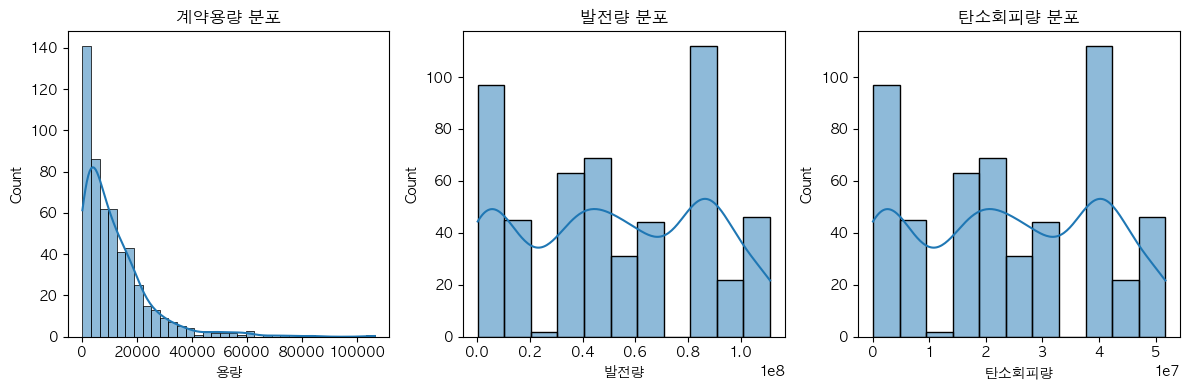

In [26]:
#분포 확인
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(merged_data['용량'], kde=True)
plt.title('계약용량 분포')

plt.subplot(1, 3, 2)
sns.histplot(merged_data['발전량'], kde=True)
plt.title('발전량 분포')

plt.subplot(1, 3, 3)
sns.histplot(merged_data['탄소회피량'], kde=True)
plt.title('탄소회피량 분포')
plt.tight_layout()
plt.show()

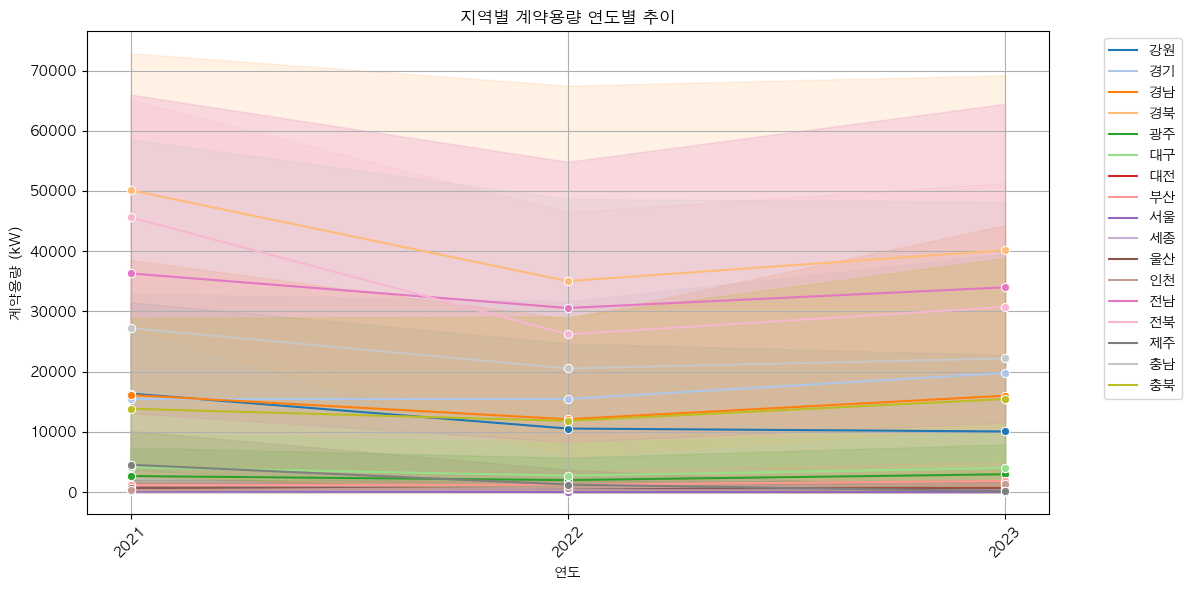

In [27]:
#Q1: 계약량 추이

merged_data['용량'] = pd.to_numeric(merged_data['용량'], errors='coerce')
#remove nan value
merged_data = merged_data.dropna(subset=['용량'])

#Create bins -> 용량
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', 
          '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000']

#Bin 용량 values into ranges
merged_data['용량_구간'] = pd.cut(merged_data['용량'], bins=bins, labels=labels, right=False)

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=merged_data.groupby(['연도', '시도구분', '용량_구간'])['용량'].sum().reset_index(),
    x='연도', y='용량', hue='시도구분', marker='o', 
    palette='tab20'
)

plt.title('지역별 계약용량 연도별 추이')
plt.ylabel('계약용량 (kW)')
plt.xlabel('연도')
plt.xticks(ticks=merged_data['연도'].unique(), rotation=45)  # x축 글씨 회전
#plt.yticks(rotation=90)  # y축 글씨 회전
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [28]:
#Q2: 계약량과 실제 발전량 간의 상관관계 분석
merged_data1 = merged_data.groupby('연도')[['용량', '발전량']].mean().reset_index()
merged_data1

,연도,용량,발전량
0,2021,13154.919274,4.969556e+07
1,2022,10298.263051,5.273990e+07
2,2023,11446.464057,5.329096e+07


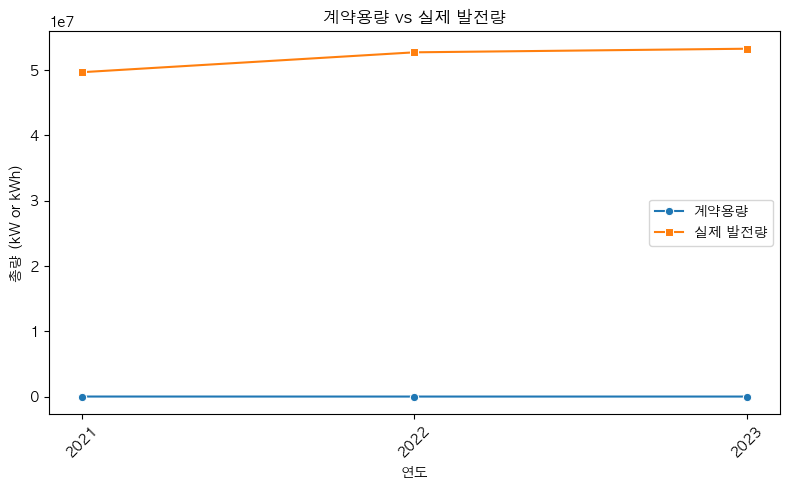

In [29]:
#Q2: 계약량과 실제 발전량 간의 상관관계 분석
#plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=merged_data1, x='연도', y='용량', marker='o', label='계약용량')
sns.lineplot(data=merged_data1, x='연도', y='발전량', marker='s', label='실제 발전량')
plt.title('계약용량 vs 실제 발전량')
plt.ylabel('총량 (kW or kWh)')
plt.xticks(ticks=merged_data['연도'].unique(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
#Q2: 계약량과 실제 발전량 간의 상관관계 분석
energy_df_c = merged_data.copy()

#calculate
#계약대비_증가량: 발전량 - 용량
#계약대비_증가율(%): 계약량 대비 발전량 증가 비율

energy_df_c['계약대비_증가량'] = energy_df_c['발전량'] - energy_df_c['용량']
energy_df_c['계약대비_증가율(%)'] = (energy_df_c['계약대비_증가량'] / energy_df_c['용량']) * 100
energy_df_c.isnull().sum()
mode_value = energy_df_c['용량_구간'].mode()[0]

energy_df_c['용량_구간'] = energy_df_c['용량_구간'].fillna(mode_value)
energy_df_c

,연도,시도구분,용량,발전량,탄소회피량,용량_구간,계약대비_증가량,계약대비_증가율(%)
0,2023,강원,3919.00,3.642853e+07,1.693927e+07,0-10000,3.642461e+07,9.294363e+05
1,2023,강원,7910.38,3.642853e+07,1.693927e+07,0-10000,3.642062e+07,4.604155e+05
2,2023,강원,1939.52,3.642853e+07,1.693927e+07,0-10000,3.642659e+07,1.878124e+06
3,2023,강원,11195.11,3.642853e+07,1.693927e+07,10001-20000,3.641733e+07,3.252968e+05
4,2023,강원,371.65,3.642853e+07,1.693927e+07,0-10000,3.642816e+07,9.801737e+06
...,...,...,...,...,...,...,...,...
526,2021,충북,3430.71,2.204816e+06,1.025239e+06,0-10000,2.201385e+06,6.416704e+04
527,2021,충북,1197.05,2.204816e+06,1.025239e+06,0-10000,2.203619e+06,1.840874e+05
528,2021,충북,15595.68,2.204816e+06,1.025239e+06,10001-20000,2.189220e+06,1.403735e+04
529,2021,충북,3996.95,2.204816e+06,1.025239e+06,0-10000,2.200819e+06,5.506245e+04


In [31]:
increase_region = energy_df_c.groupby('시도구분')['계약대비_증가율(%)'].mean().reset_index()
increase_region


,시도구분,계약대비_증가율(%)
0,강원,1.381189e+06
1,경기,3.664958e+06
2,경남,2.053596e+06
3,경북,1.306134e+06
4,광주,1.111113e+05
5,대구,1.874298e+05
6,대전,3.834650e+04
7,부산,1.920434e+06
8,서울,5.525256e+05
9,세종,8.426073e+04


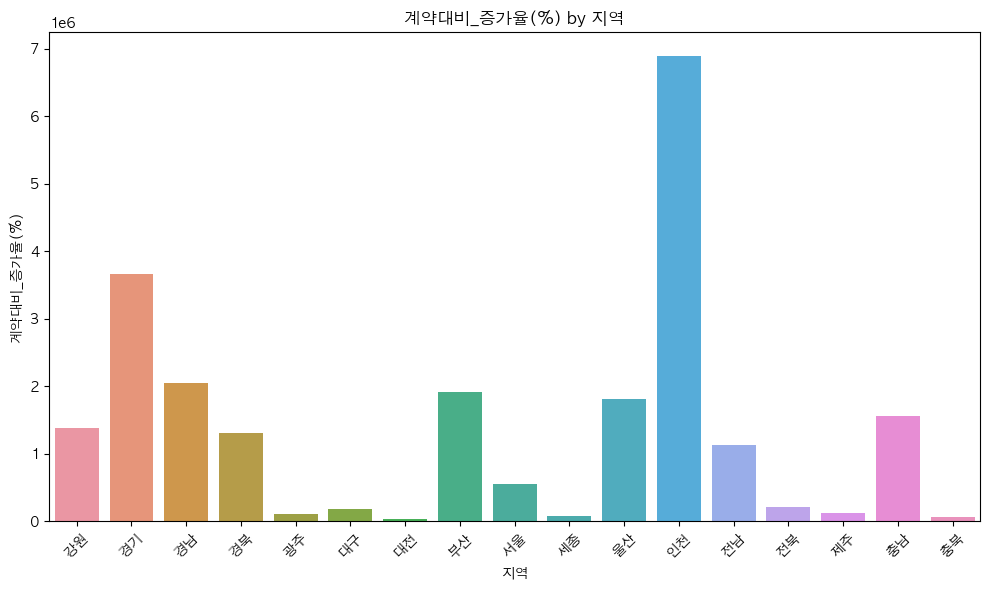

In [32]:
#plot
plt.figure(figsize=(10, 6))
sns.barplot(x='시도구분', y='계약대비_증가율(%)', data=increase_region)
plt.xlabel('지역')
plt.ylabel('계약대비_증가율(%)')
plt.title('계약대비_증가율(%) by 지역')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


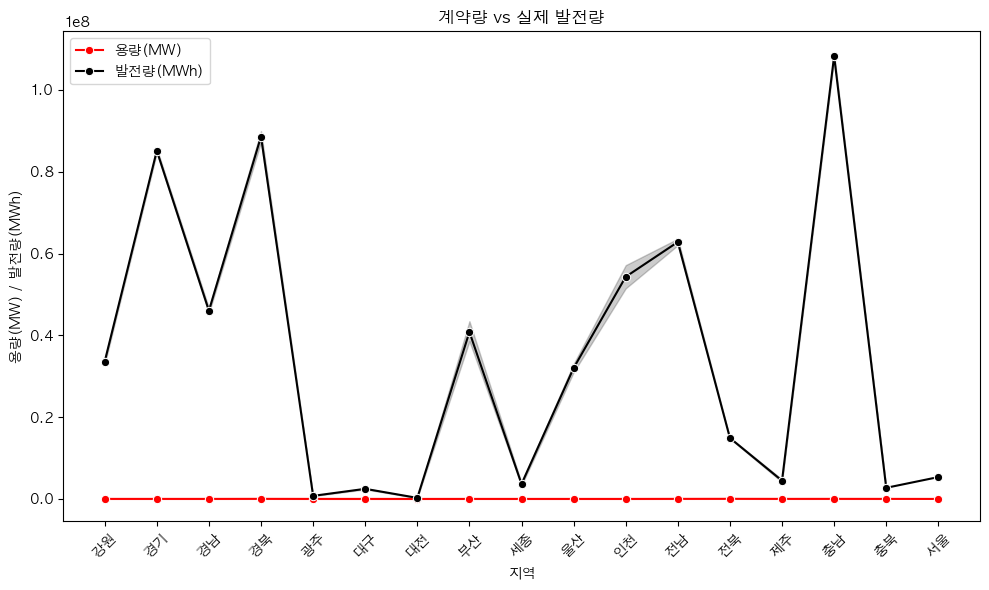

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='시도구분', y='용량', data=energy_df_c, marker='o', label='용량(MW)', color='red')
sns.lineplot(x='시도구분', y='발전량', data=energy_df_c, marker='o', label='발전량(MWh)', color='black')

plt.xlabel('지역')
plt.ylabel('용량(MW) / 발전량(MWh)')
plt.title('계약량 vs 실제 발전량')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
#상관관계 분석
corr = merged_data[['용량', '발전량']].corr().iloc[0, 1]
print(f"계약용량과 발전량 간 상관계수: {corr:.4f}")

계약용량과 발전량 간 상관계수: 0.1133


In [35]:
#0으로 나누는 것을 방지
merged_df2 = merged_data[merged_data['용량'] > 0]
merged_df2

#이행률 컬럼 추가
merged_df2['이행률(%)'] = (merged_data['발전량'] / merged_data['용량']) * 100
merged_df2


,연도,시도구분,용량,발전량,탄소회피량,용량_구간,이행률(%)
0,2023,강원,3919.00,3.642853e+07,1.693927e+07,0-10000,9.295363e+05
1,2023,강원,7910.38,3.642853e+07,1.693927e+07,0-10000,4.605155e+05
2,2023,강원,1939.52,3.642853e+07,1.693927e+07,0-10000,1.878224e+06
3,2023,강원,11195.11,3.642853e+07,1.693927e+07,10001-20000,3.253968e+05
4,2023,강원,371.65,3.642853e+07,1.693927e+07,0-10000,9.801837e+06
...,...,...,...,...,...,...,...
526,2021,충북,3430.71,2.204816e+06,1.025239e+06,0-10000,6.426704e+04
527,2021,충북,1197.05,2.204816e+06,1.025239e+06,0-10000,1.841874e+05
528,2021,충북,15595.68,2.204816e+06,1.025239e+06,10001-20000,1.413735e+04
529,2021,충북,3996.95,2.204816e+06,1.025239e+06,0-10000,5.516245e+04


In [36]:
#연도별 평균 이행률
avg_year = merged_df2.groupby('연도')['이행률(%)'].mean().reset_index()
avg_year

,연도,이행률(%)
0,2021,1.591204e+06
1,2022,1.684472e+06
2,2023,1.352330e+06


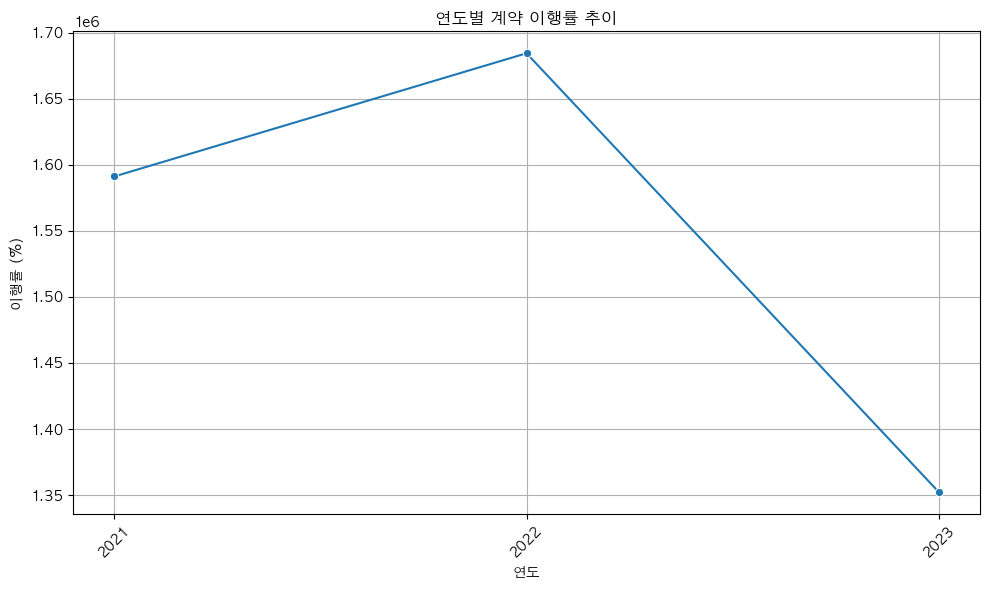

In [37]:
#plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_year, x='연도', y='이행률(%)', marker='o')
plt.title('연도별 계약 이행률 추이')
plt.ylabel('이행률 (%)')
plt.xlabel('연도')
plt.xticks(ticks=avg_year['연도'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
#Q3: 탄소회피는 얼마나 되었는지

total = merged_data['탄소회피량'].sum()
print("탄소회피량: ",total)

탄소회피량:  12813719161.995602


In [39]:
#Q3: 탄소회피는 얼마나 되었는지

region_total = merged_data.groupby('시도구분')['탄소회피량'].sum().reset_index()
region_total


,시도구분,탄소회피량
0,강원,8.120742e+08
1,경기,2.692659e+09
2,경남,1.348308e+09
3,경북,2.719972e+09
4,광주,4.191998e+06
5,대구,2.298262e+07
6,대전,1.678902e+06
7,부산,1.519218e+08
8,서울,2.484909e+06
9,세종,5.100384e+06


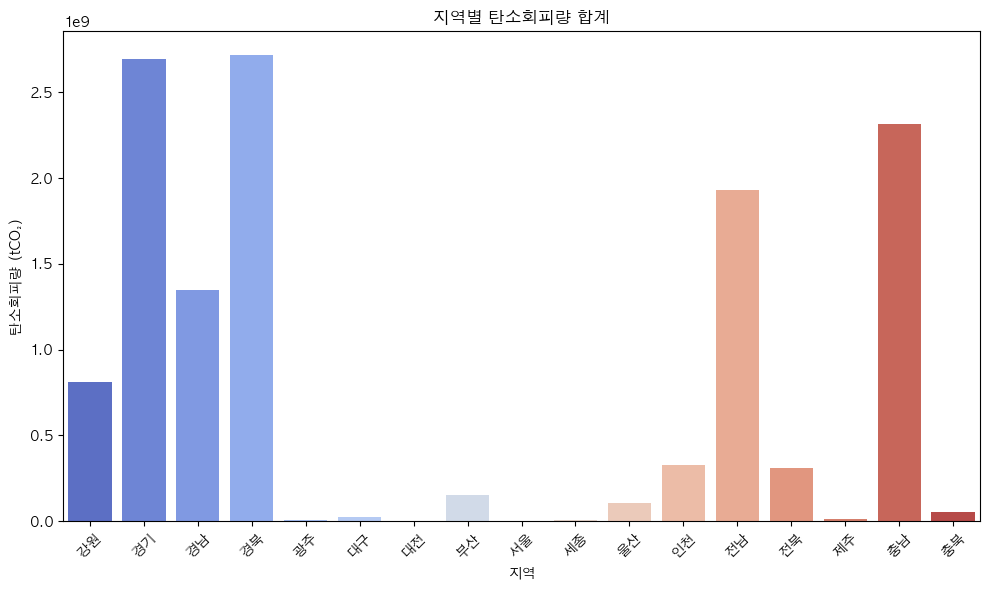

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_total, x='시도구분', y='탄소회피량', palette='coolwarm')
plt.xlabel('지역')
plt.ylabel('탄소회피량 (tCO₂)')
plt.title('지역별 탄소회피량 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
#Q3: 계약량과 탄소 회피량 간 회귀 분석
#단순 상관분석
corr_1 = merged_data[['용량', '탄소회피량']].corr()
print("[계약량과 탄소회피량 간 상관계수]\n", corr_1)

[계약량과 탄소회피량 간 상관계수]
              용량     탄소회피량
용량     1.000000  0.113274
탄소회피량  0.113274  1.000000


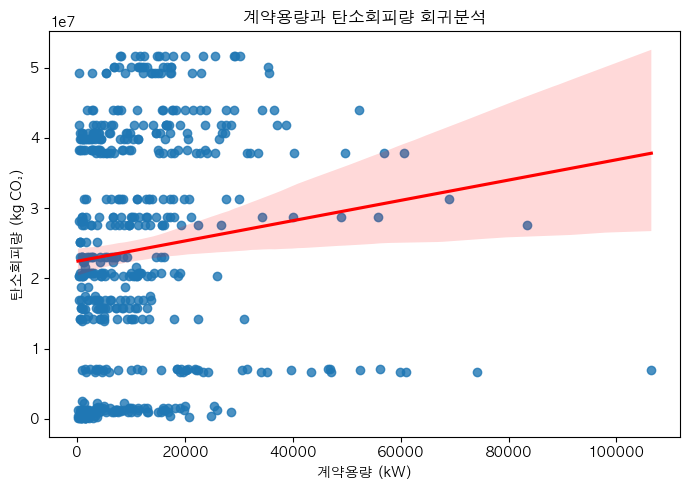

In [42]:
plt.figure(figsize=(7, 5))
sns.regplot(x='용량', y='탄소회피량', data=merged_data, line_kws={'color': 'red'})
plt.title('계약용량과 탄소회피량 회귀분석')
plt.xlabel('계약용량 (kW)')
plt.ylabel('탄소회피량 (kg CO₂)')
plt.tight_layout()
plt.show()


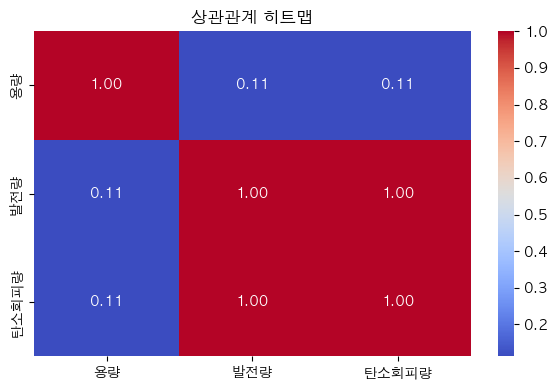

In [43]:
#hearmat(plot)
plt.figure(figsize=(6, 4))
sns.heatmap(merged_data[['용량', '발전량', '탄소회피량']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 히트맵')
plt.tight_layout()
plt.show()

In [44]:
#시계열 분석
merged_data_trend = merged_data.groupby('연도')[['용량', '발전량', '탄소회피량']].sum().reset_index()
merged_data_trend


,연도,용량,발전량,탄소회피량
0,2021,2354730.55,8.895505e+09,4.136410e+09
1,2022,1822792.56,9.334962e+09,4.340757e+09
2,2023,2003131.21,9.325919e+09,4.336552e+09


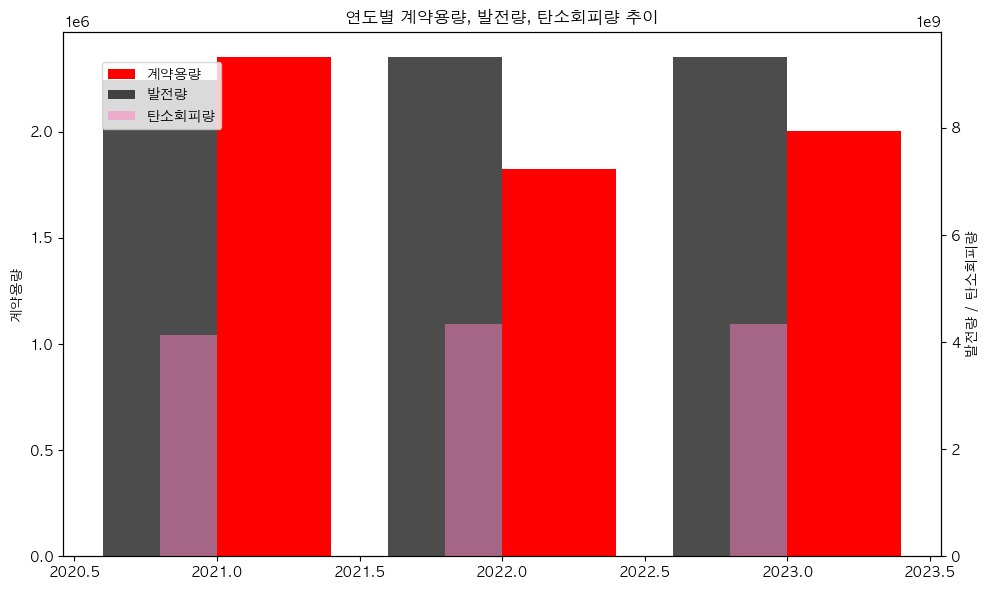

In [55]:
#1번와 2번 결과가 같아서 쓰고 싶은 plot 써주세요. 
#1
fig, ax1 = plt.subplots(figsize=(10, 6))

# 왼쪽 Y축 - 계약용량
ax1.bar(merged_data_trend['연도'], merged_data_trend['용량'], color='red', label='계약용량', width=0.4, align='edge')
ax1.set_ylabel('계약용량', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 오른쪽 Y축 - 발전량과 탄소회피량
ax2 = ax1.twinx()
ax2.bar(merged_data_trend['연도'], merged_data_trend['발전량'], color='black', label='발전량', width=-0.4, align='edge', alpha=0.7)
ax2.bar(merged_data_trend['연도'], merged_data_trend['탄소회피량'], color='#FF81C0', label='탄소회피량', width=-0.2, align='edge', alpha=0.5)
ax2.set_ylabel('발전량 / 탄소회피량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('연도별 계약용량, 발전량, 탄소회피량 추이')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


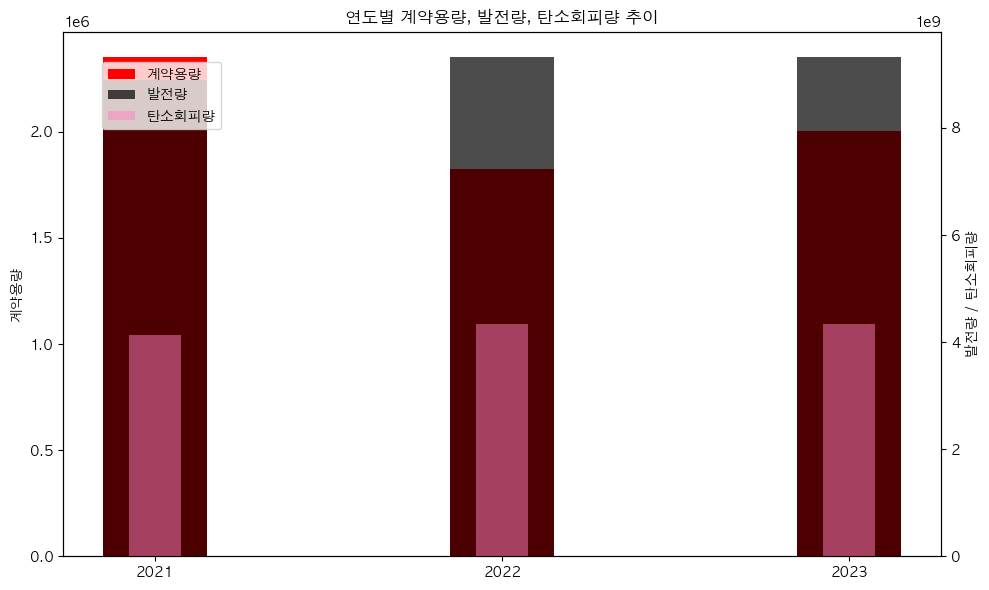

In [57]:
#2
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: 계약용량
ax1.bar(merged_data_trend['연도'], merged_data_trend['용량'], color='red', label='계약용량', width=0.3)
ax1.set_ylabel('계약용량', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Right Y-axis: 발전량 + 탄소회피량
ax2 = ax1.twinx()
ax2.bar(merged_data_trend['연도'], merged_data_trend['발전량'], color='black', label='발전량', width=0.3, alpha=0.7)
ax2.bar(merged_data_trend['연도'], merged_data_trend['탄소회피량'], color='#FF81C0', label='탄소회피량', width=0.15, alpha=0.5)
ax2.set_ylabel('발전량 / 탄소회피량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#clean year labels
ax1.set_xticks(merged_data_trend['연도'])

plt.title('연도별 계약용량, 발전량, 탄소회피량 추이')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()
